In [4]:
import pandas as pd 
import keras
import numpy as np

Using TensorFlow backend.


In [36]:
data = pd.read_csv('E:/Python_code/keras_total/日月光华-keras课程资料/小型数据集/train1.csv')  # 统一用反斜杠/！！

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


预测数据y：Survived列 —— 已经编码为0或1(1为获救，0为死掉) <p>
影响属性：Pclass(票价等级)、Sex(性别)、Age(年龄)、Fare(票价)、Embarked(船舱位置) —— 是字符串的要编码为数值(独热编码)

# 数据预处理

In [37]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
y = data.Survived
x = data[ ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] ]

In [40]:
x.Embarked.unique()  # 对于是字符串内容的，需要编码为数值！—— 独热编码

array(['S', 'C', 'Q', nan], dtype=object)

In [41]:
x.loc[:, 'Embarked_S'] = (x.Embarked == 'S').astype('int')
x.loc[:, 'Embarked_C'] = (x.Embarked == 'C').astype('int')
x.loc[:, 'Embarked_Q'] = (x.Embarked == 'Q').astype('int')
del x['Embarked']

e:\pycharm\python374\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [42]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,3,male,22.0,1,0,7.2500,1,0,0
1,1,female,38.0,1,0,71.2833,0,1,0
2,3,female,26.0,0,0,7.9250,1,0,0
3,1,female,35.0,1,0,53.1000,1,0,0
4,3,male,35.0,0,0,8.0500,1,0,0
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,1,0,0
887,1,female,19.0,0,0,30.0000,1,0,0
888,3,female,NaN,1,2,23.4500,1,0,0
889,1,male,26.0,0,0,30.0000,0,1,0


In [43]:
x.loc[:, 'Sex'] = (x.Sex == 'male').astype('int')

In [44]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,3,1,22.0,1,0,7.2500,1,0,0
1,1,0,38.0,1,0,71.2833,0,1,0
2,3,0,26.0,0,0,7.9250,1,0,0
3,1,0,35.0,1,0,53.1000,1,0,0
4,3,1,35.0,0,0,8.0500,1,0,0
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,1,0,0
887,1,0,19.0,0,0,30.0000,1,0,0
888,3,0,NaN,1,2,23.4500,1,0,0
889,1,1,26.0,0,0,30.0000,0,1,0


In [47]:
x['Age'] = x.Age.fillna( x.Age.mean() )  # 把空缺值用均值填上
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Pclass        891 non-null int64
Sex           891 non-null int32
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_S    891 non-null int32
Embarked_C    891 non-null int32
Embarked_Q    891 non-null int32
dtypes: float64(2), int32(4), int64(3)
memory usage: 48.9 KB


e:\pycharm\python374\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
# pclass的1,2,3不是数值，而是等级；所以还是把它们独热编码了好！
x.loc[:, 'pl1'] = (x.Pclass == 1).astype('int')
x.loc[:, 'pl2'] = (x.Pclass == 2).astype('int')
x.loc[:, 'pl3'] = (x.Pclass == 3).astype('int')
del x['Pclass']
x

,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,pl1,pl2,pl3
0,1,22.000000,1,0,7.2500,1,0,0,0,0,1
1,0,38.000000,1,0,71.2833,0,1,0,1,0,0
2,0,26.000000,0,0,7.9250,1,0,0,0,0,1
3,0,35.000000,1,0,53.1000,1,0,0,1,0,0
4,1,35.000000,0,0,8.0500,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,1,27.000000,0,0,13.0000,1,0,0,0,1,0
887,0,19.000000,0,0,30.0000,1,0,0,1,0,0
888,0,29.699118,1,2,23.4500,1,0,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,0,1,0,0


In [54]:
x.shape, y.shape

((891, 11), (891,))

# 网络搭建

In [55]:
model = keras.Sequential()

from keras import layers

In [56]:
#  y_pret = sigmoid(w1*x1 + w2*x2 + ... w11*x11 + b) —— 共 11+1=12 个参数；对预测结果再做一个sigmoid函数运算而已！
model.add( layers.Dense(1, input_dim = 11, activation='sigmoid' ) )  

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile( optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['acc']
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [61]:
history = model.fit(x, y, epochs = 300)


Epoch 1/300
891/891 [==============================] - 0s 443us/step - loss: 3.5909 - acc: 0.3176
Epoch 2/300
891/891 [==============================] - 0s 29us/step - loss: 3.0810 - acc: 0.3154
Epoch 3/300
891/891 [==============================] - 0s 35us/step - loss: 2.6054 - acc: 0.3154
Epoch 4/300
891/891 [==============================] - 0s 30us/step - loss: 2.1439 - acc: 0.3075
Epoch 5/300
891/891 [==============================] - 0s 40us/step - loss: 1.7392 - acc: 0.3098
Epoch 6/300
891/891 [==============================] - 0s 35us/step - loss: 1.3641 - acc: 0.3143
Epoch 7/300
891/891 [==============================] - 0s 36us/step - loss: 1.0672 - acc: 0.3109
Epoch 8/300
891/891 [==============================] - 0s 36us/step - loss: 0.8611 - acc: 0.3412
Epoch 9/300
891/891 [==============================] - 0s 36us/step - loss: 0.7506 - acc: 0.5578
Epoch 10/300
891/891 [==============================] - 0s 31us/step - loss: 0.7065 - acc: 0.5948
Epoch 11/300
891/891 [=====

891/891 [==============================] - 0s 22us/step - loss: 0.5194 - acc: 0.7486
Epoch 83/300
891/891 [==============================] - 0s 27us/step - loss: 0.5189 - acc: 0.7654
Epoch 84/300
891/891 [==============================] - 0s 29us/step - loss: 0.5173 - acc: 0.7497
Epoch 85/300
891/891 [==============================] - 0s 25us/step - loss: 0.5179 - acc: 0.7666
Epoch 86/300
891/891 [==============================] - 0s 29us/step - loss: 0.5145 - acc: 0.7688
Epoch 87/300
891/891 [==============================] - 0s 25us/step - loss: 0.5137 - acc: 0.7542
Epoch 88/300
891/891 [==============================] - 0s 26us/step - loss: 0.5122 - acc: 0.7643
Epoch 89/300
891/891 [==============================] - 0s 25us/step - loss: 0.5112 - acc: 0.7643
Epoch 90/300
891/891 [==============================] - 0s 28us/step - loss: 0.5100 - acc: 0.7654
Epoch 91/300
891/891 [==============================] - 0s 24us/step - loss: 0.5095 - acc: 0.7654
Epoch 92/300
891/891 [===========

891/891 [==============================] - 0s 27us/step - loss: 0.4611 - acc: 0.8126
Epoch 166/300
891/891 [==============================] - 0s 28us/step - loss: 0.4614 - acc: 0.8114
Epoch 167/300
891/891 [==============================] - 0s 29us/step - loss: 0.4607 - acc: 0.8047
Epoch 168/300
891/891 [==============================] - 0s 25us/step - loss: 0.4604 - acc: 0.8137
Epoch 169/300
891/891 [==============================] - 0s 25us/step - loss: 0.4602 - acc: 0.8070
Epoch 170/300
891/891 [==============================] - 0s 25us/step - loss: 0.4625 - acc: 0.8103
Epoch 171/300
891/891 [==============================] - 0s 22us/step - loss: 0.4624 - acc: 0.8070
Epoch 172/300
891/891 [==============================] - 0s 30us/step - loss: 0.4605 - acc: 0.8159
Epoch 173/300
891/891 [==============================] - 0s 28us/step - loss: 0.4605 - acc: 0.8092
Epoch 174/300
891/891 [==============================] - 0s 25us/step - loss: 0.4585 - acc: 0.8081
Epoch 175/300
891/891 [=

891/891 [==============================] - 0s 26us/step - loss: 0.4464 - acc: 0.8103
Epoch 248/300
891/891 [==============================] - 0s 24us/step - loss: 0.4468 - acc: 0.8114
Epoch 249/300
891/891 [==============================] - 0s 26us/step - loss: 0.4470 - acc: 0.8058
Epoch 250/300
891/891 [==============================] - 0s 24us/step - loss: 0.4474 - acc: 0.8036
Epoch 251/300
891/891 [==============================] - 0s 27us/step - loss: 0.4466 - acc: 0.8171
Epoch 252/300
891/891 [==============================] - 0s 26us/step - loss: 0.4467 - acc: 0.8047
Epoch 253/300
891/891 [==============================] - 0s 27us/step - loss: 0.4464 - acc: 0.8103
Epoch 254/300
891/891 [==============================] - 0s 26us/step - loss: 0.4473 - acc: 0.8103
Epoch 255/300
891/891 [==============================] - 0s 28us/step - loss: 0.4462 - acc: 0.8137
Epoch 256/300
891/891 [==============================] - 0s 26us/step - loss: 0.4465 - acc: 0.8092
Epoch 257/300
891/891 [=

In [64]:
history.history.keys()

dict_keys(['loss', 'acc'])

In [65]:
loss = history.history.get('loss')
acc = history.history.get('acc')

In [66]:
import matplotlib.pyplot as plt

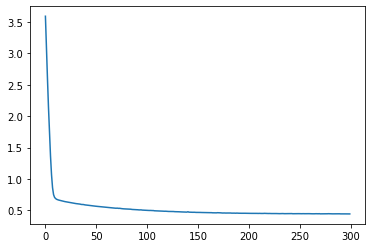

In [67]:
plt.plot( range(len(loss)), loss )

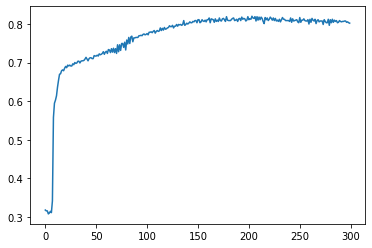

In [68]:
plt.plot( range(len(acc)), acc)